In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv('lab_vehicle.csv')
df = df.values
df.shape

(846, 18)

## KMeans from Scratch

In [3]:
def initial_centroids(X, k):
  m, n = X.shape
  centroids = np.random.choice(m, k, replace=False)
  return X[centroids, :]


In [4]:
def assign_clusters(X, centroids):
  labels = np.zeros(X.shape[0])
  for i in range(X.shape[0]):
      distances = np.linalg.norm(X[i] - centroids, axis=1)
      labels[i] = np.argmin(distances)
  return labels

In [5]:
def update_centroids(X, k, labels):
  centroids = np.zeros((k, X.shape[1]))
  for i in range(k):
    centroids[i] = np.mean(X[labels.astype(int)==i],axis=0)
  return centroids


In [6]:
def kmeans(X, k, tolerance=1e-4):
  count = 0
  centroids = initial_centroids(X, k)
  while count != 100:
    labels = assign_clusters(X, centroids)
    new_centroids = update_centroids(X, k, labels)
    if np.linalg.norm(new_centroids - centroids) < tolerance:
             break
    centroids = new_centroids
    count += 1
  return new_centroids, labels


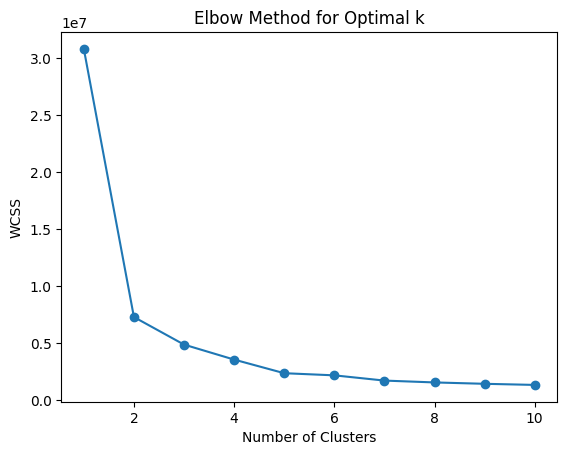

In [7]:
def elbow_method(X, max_clusters=10):
  wcss = []
  for i in range(1, max_clusters + 1):
    np.random.seed(1)
    centroids, labels = kmeans(X, i)

    current_wcss = 0
    for j in range(i):
      current_wcss += np.sum(np.linalg.norm(X[labels == j] - centroids[j], axis=1)**2)
    wcss.append(current_wcss)

  return wcss

wcss_values = elbow_method(df, max_clusters=10)

plt.plot(range(1, 11), wcss_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [8]:
np.random.seed(1)
centers, labels = kmeans(df, 2)

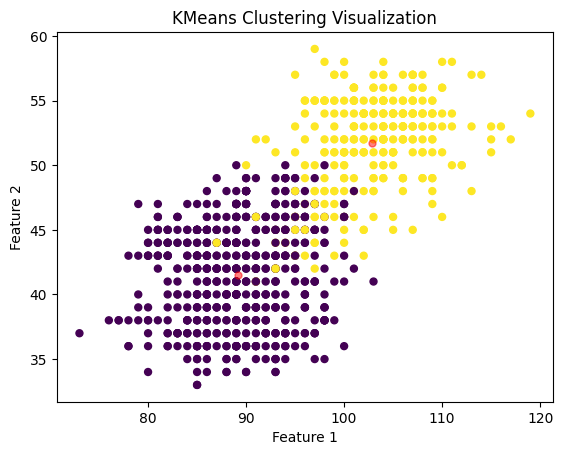

In [9]:
plt.scatter(df[:, 0], df[:, 1], c=labels, s=25, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=25, alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Visualization')
plt.show()


In [10]:
silhouette_avg = silhouette_score(df, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.6735098638013705
